# Explaratory Data Analysis

* **Input**: raw training dataset
* **Output**: None

**Objective**: This notebook explores the dataset

# Imports

In [1]:
import numpy as np
import pandas as pd
import datatable as dt

from scipy.stats import kurtosis, skew

import seaborn as sns
import matplotlib.pyplot as plt

## Options

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
max_rows = 200000

# Import Data

In [4]:
df_train = pd.read_csv('../data/train.csv', nrows=max_rows)

In [5]:
df_train.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,NaN,NaN,-0.989982,-1.055090,NaN,NaN,-2.667671,-2.001475,-1.703595,-2.196892,NaN,NaN,1.483295,1.307466,NaN,NaN,1.175200,0.967805,1.608410,1.319365,NaN,NaN,-0.515073,-0.448988,NaN,NaN,-2.429812,-2.206423,-3.593120,-2.868358,0.112697,0.053157,-0.539956,-0.692187,3.491282,-1.684889,1.337123,-0.328607,1.689207,-1.052243,-1.870885,-1.789342,-1.574173,-1.120820,-0.571920,-1.093033,0.703515,5.936281,NaN,3.315812,1.291338,2.468825,2.490069,-1.148239,-0.961935,-2.263944,-2.158765,-5.012022,-2.006825,-1.284090,-2.141697,-2.054935,-1.851203,-1.431184,-1.634481,NaN,-0.373934,NaN,0.559241,0.891368,0.271700,NaN,-1.521125,NaN,3.045337,3.260512,0.683558,NaN,-0.109194,NaN,0.488806,1.447504,-2.790902,NaN,1.158770,NaN,3.754522,7.137163,-1.863069,NaN,0.434466,NaN,-0.292035,0.317003,-2.605820,NaN,2.896986,NaN,1.485813,4.147254,-2.238831,NaN,-0.892724,NaN,-0.156332,0.622816,-3.921523,NaN,2.561593,NaN,3.457757,6.649580,-1.472686,NaN,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,NaN,NaN,-0.151877,-0.384952,NaN,NaN,1.225838,0.789076,1.110580,1.102281,NaN,NaN,-0.590600,-0.625682,NaN,NaN,-0.543425,-0.547486,-0.706600,-0.667806,NaN,NaN,0.910558,0.914465,NaN,NaN,2.137454,2.080459,2.819291,2.483965,-0.086755,-0.082687,0.368431,0.469196,5.711996,-2.215132,0.796703,-1.140081,0.716617,-0.059431,-0.198920,-0.326697,-0.381770,1.435607,3.401393,2.486748,-2.014598,-0.390588,NaN,-0.027262,-1.886927,-1.706450,-0.888236,-1.138294,-0.954461,-1.350633,-1.459546,-4.564815,-2.651966,-1.620014,-2.240625,-2.147273,-0.255224,3.202946,-0.535872,NaN,-0.050948,NaN,0.141089,0.058363,0.131190,NaN,-0.121239,NaN,0.677553,0.045842,-0.124616,NaN,-0.007004,NaN,-0.410491,-0.024323,-3.012654,NaN,1.157671,NaN,1.297679,1.281956,-2.427595,NaN,0.024913,NaN,-0.413607,-0.073672,-2.434546,NaN,0.949879,NaN,0.724655,1.622137,-2.209020,NaN,-1.332492,NaN,-0.586619,-1.040491,-3.946097,NaN,0.983440,NaN,1.357907,1.612348,-1.664544,NaN,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,NaN,NaN,5.448261,2.668029,NaN,NaN,3.836342,2.183258,3.902698,3.045431,NaN,NaN,-1.141082,-0.979962,NaN,NaN,-1.157585,-0.966803,

# EDA

## Resp: Return over different time horizons

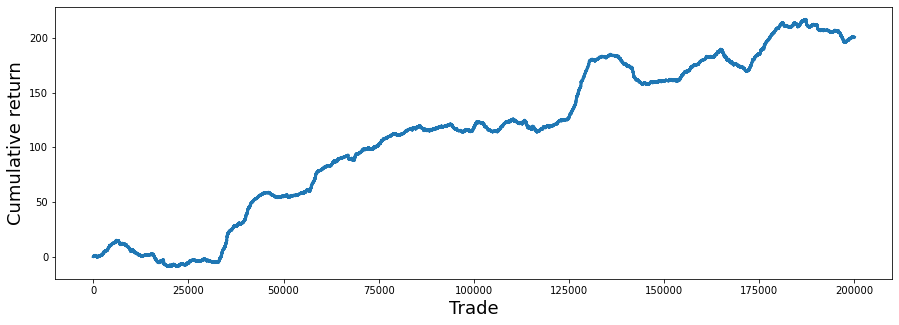

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
balance= pd.Series(df_train['resp']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_ylabel ("Cumulative return", fontsize=18);
balance.plot(lw=3);

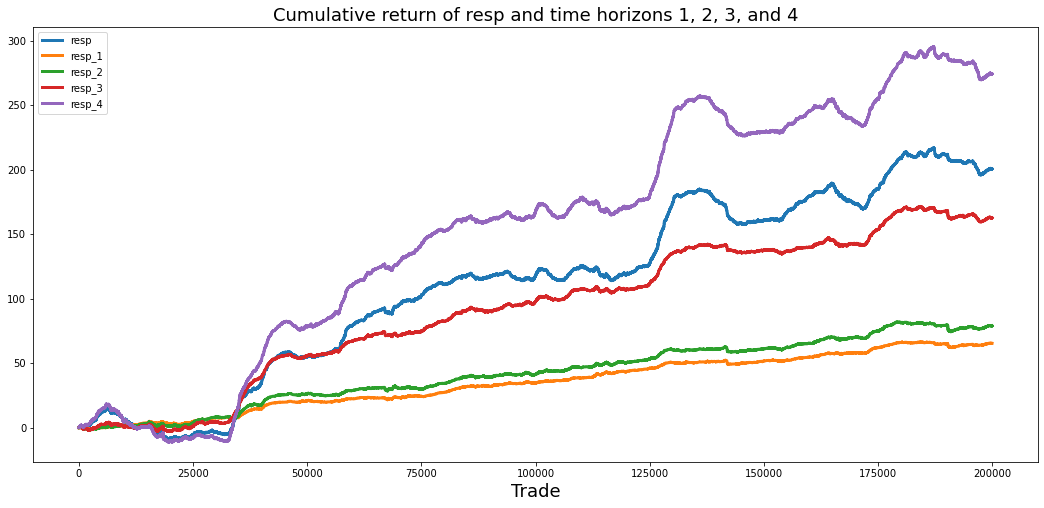

In [7]:
fig, ax = plt.subplots(figsize=(18, 8))
balance= pd.Series(df_train['resp']).cumsum()
resp_1= pd.Series(df_train['resp_1']).cumsum()
resp_2= pd.Series(df_train['resp_2']).cumsum()
resp_3= pd.Series(df_train['resp_3']).cumsum()
resp_4= pd.Series(df_train['resp_4']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative return of resp and time horizons 1, 2, 3, and 4", fontsize=18)
balance.plot(lw=3)
resp_1.plot(lw=3)
resp_2.plot(lw=3)
resp_3.plot(lw=3)
resp_4.plot(lw=3)
plt.legend()

C:\Users\Benjamin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


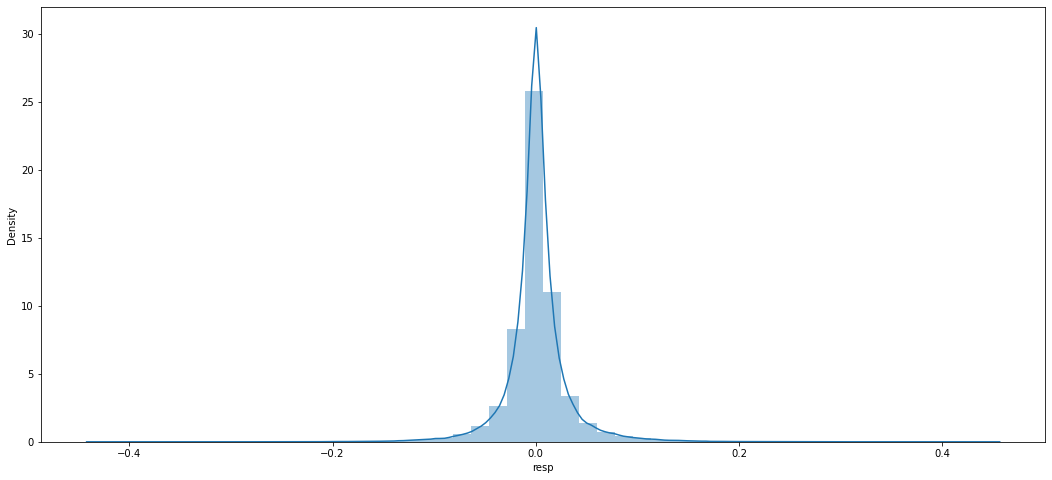

In [8]:
plt.figure(figsize=(18, 8))
ax = sns.distplot(df_train['resp'])
plt.show()

In [9]:
min_resp = df_train['resp'].min()
print('The minimum value for resp is: %.5f' % min_resp)
max_resp = df_train['resp'].max()
print('The maximum value for resp is:  %.5f' % max_resp)

The minimum value for resp is: -0.43402
The maximum value for resp is:  0.44846


In [10]:
print('The skew of resp is: {:2.3f}'.format(skew(df_train['resp'])))
print('The kurstosis of resp is: {:2.2f}'.format(kurtosis(df_train['resp'])))

The skew of resp is: 0.362
The kurstosis of resp is: 13.57


## Weight

In [11]:
p_zero_weight = df_train[df_train['weight'] == 0].shape[0] / df_train.shape[0]
print('The percentage of zero weights is {:2.2%}'.format(p_zero_weight))

The percentage of zero weights is 22.24%


In [12]:
n_neg_weights = df_train[df_train['weight'] < 0].shape[0]
print('There are {} negative weights'.format(n_neg_weights))

There are 0 negative weights


In [13]:
max_weight = df_train['weight'].max()
print('The maximum weight is {:.2f}'.format(max_weight))

The maximum weight is 163.61


C:\Users\Benjamin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


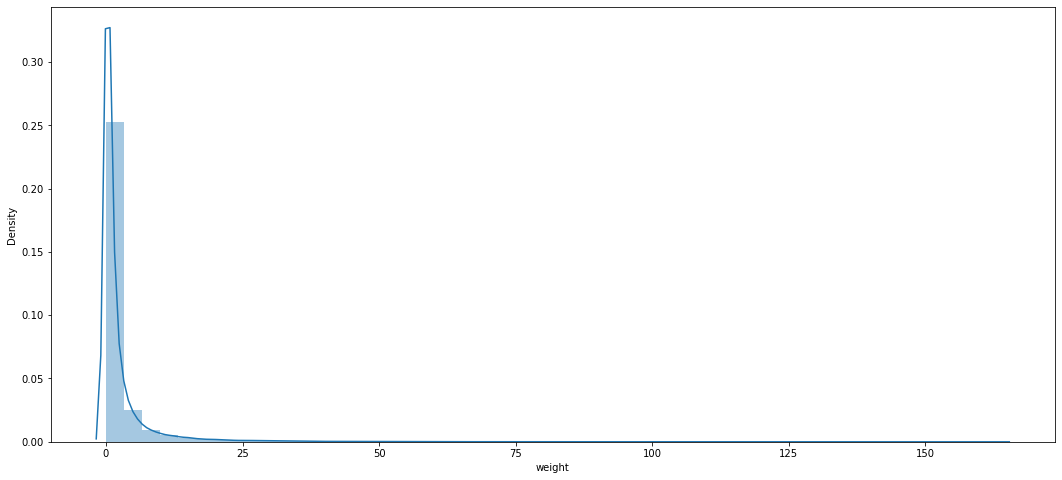

In [14]:
plt.figure(figsize=(18, 8))
ax = sns.distplot(df_train['weight'])
plt.show()

C:\Users\Benjamin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


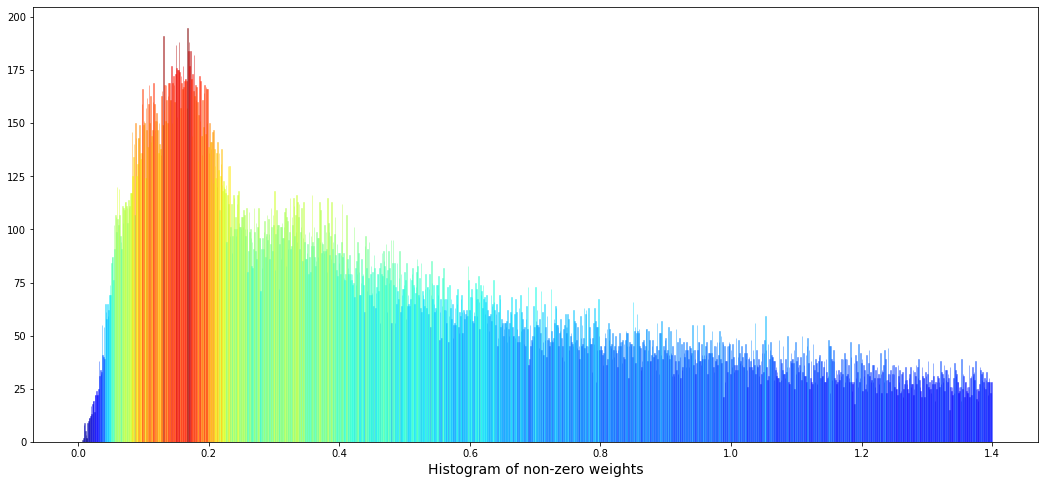

In [15]:
plt.figure(figsize = (18,8))
ax = sns.distplot(df_train['weight'], 
    bins=1400, 
    kde_kws={"clip":(0.001,1.4)}, 
    hist_kws={"range":(0.001,1.4)},
    color='darkcyan', 
    kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of non-zero weights", size=14)
plt.show();

## Cumulative return

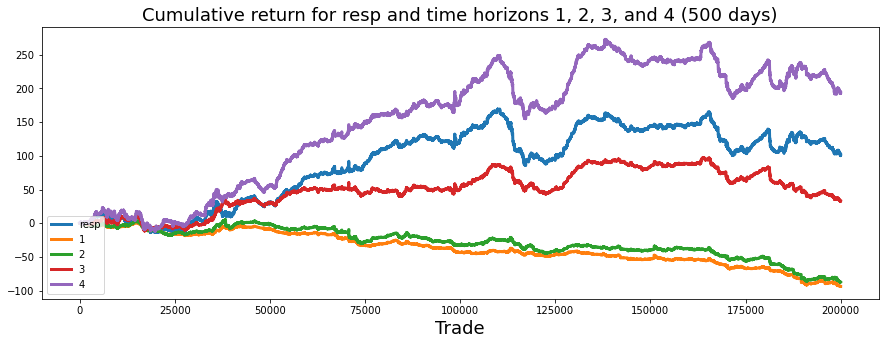

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
balance= pd.Series(df_train['resp']*df_train['weight']).cumsum()
resp_1= pd.Series(df_train['resp_1']*df_train['weight']).cumsum()
resp_2= pd.Series(df_train['resp_2']*df_train['weight']).cumsum()
resp_3= pd.Series(df_train['resp_3']*df_train['weight']).cumsum()
resp_4= pd.Series(df_train['resp_4']*df_train['weight']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative return for resp and time horizons 1, 2, 3, and 4 (500 days)", fontsize=18)
balance.plot(lw=3, label='resp')
resp_1.plot(lw=3, label='1')
resp_2.plot(lw=3, label='2')
resp_3.plot(lw=3, label='3')
resp_4.plot(lw=3, label='4')
plt.legend(loc="lower left");

C:\Users\Benjamin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


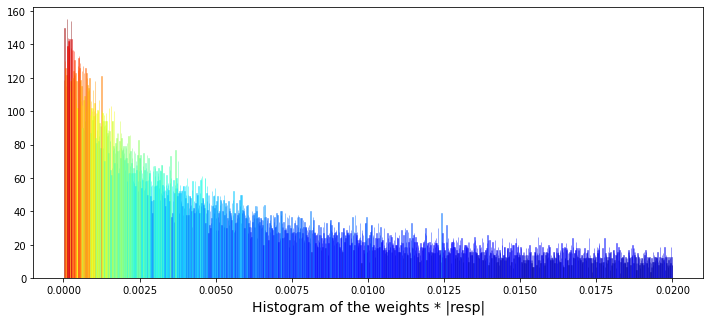

In [17]:
df_train_wtht_0 = df_train.query('weight > 0').reset_index(drop = True)
df_train_wtht_0['wAbsResp'] = df_train_wtht_0['weight'] * df_train_wtht_0['resp']
#plot
plt.figure(figsize = (12,5))
ax = sns.distplot(df_train_wtht_0['wAbsResp'], 
    bins=1500, 
    kde_kws={"clip":(0.00001,0.02)}, 
    hist_kws={"range":(0.00001,0.02)},
    color='darkcyan', 
    kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.xlabel("Histogram of the weights * |resp|", size=14)
plt.show();

## Time

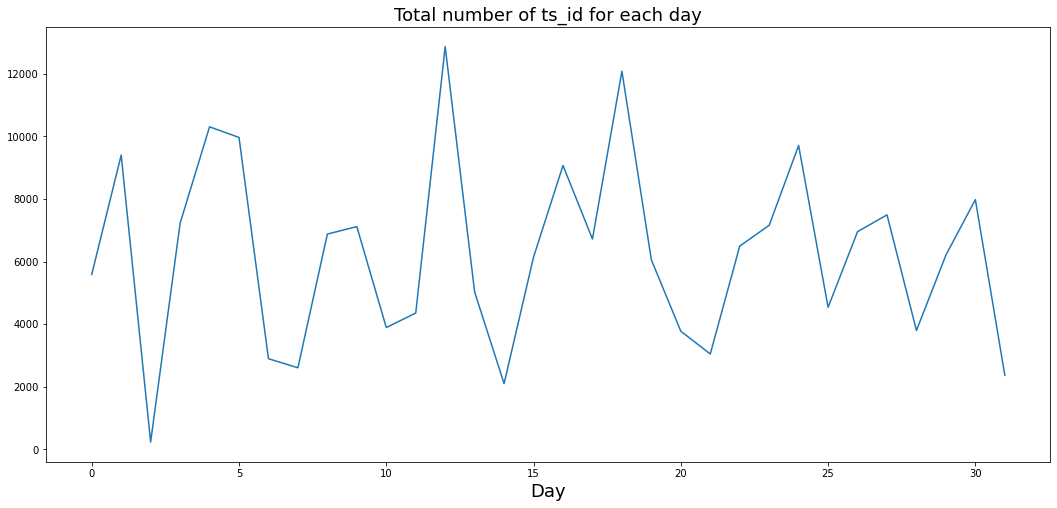

In [18]:
trades_per_day = df_train.groupby(['date'])['ts_id'].count()
fig, ax = plt.subplots(figsize=(18, 8))
plt.plot(trades_per_day)
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Total number of ts_id for each day", fontsize=18)
plt.show()

## Features

This dataset is composed of 130 columns called features.
The feature 0 is little bit different than the other features as it seems to be only composed of -1 and 1.

In [19]:
df_train['feature_0'].value_counts()

 1    101259
-1     98741
Name: feature_0, dtype: int64

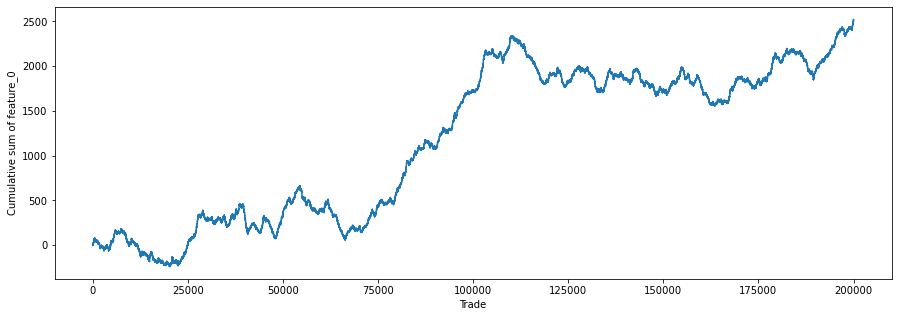

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
feat_0 = pd.Series(df_train['feature_0']).cumsum()
ax.set_xlabel('Trade')
ax.set_ylabel('Cumulative sum of feature_0')
feat_0.plot()
plt.show()